# Free Energy Perturbation based EVB in GROMACS
## Constructing the Topology

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

We will start by importing the bond scan from the quantum mechanical calculations.<br/>
The data is contained in the folder [morse_data](morse_data/). <br/>
First, we start with the Cl-C bond that has been scanned from 1.48 Å to 2.98 Å in 16 steps, and the energies are in the file `morse_data/morse_clc.txt`.

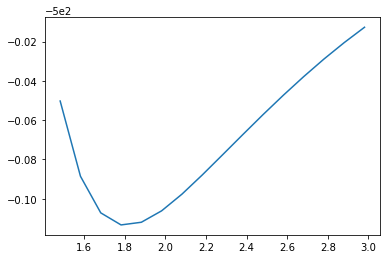

In [9]:
from struct import unpack

bond_scan_clc = np.loadtxt('morse_data/morse_clc.txt',unpack=True)
bond_distance_clc= np.linspace(1.481000770197, 2.981000770197,16)
plt.plot(bond_distance_clc,bond_scan_clc)

Now, we can fit the potential to a Morse potential
$$
M(r) = D_e (e^{-2\alpha(r-r_e)}-2e^{-\alpha(r-r_e)}+v) 
$$
Where, $D_e$ is the potential well depth, $\alpha$ controls the witdth, $r_e$ is the equilibrium distance and $v$ shift vertically the curve to overlap the data

The Morse fitting parameters are: D_e= 389.233317637426 alpha= 14.76959497739664 r_e= 0.1819857151164413


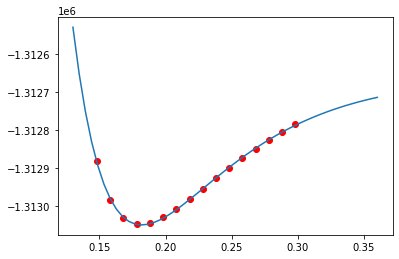

In [10]:
xdata=bond_distance_clc*0.1 #Conversion Å to nm for GROMACS
ydata= bond_scan_clc*2625.5 #Conversion Hartree to kJ/mol for GROMACS


t=np.linspace(0.13,0.36)

tstart = [1000, 1, 3, 1]
def morse(x, q, m, u, v):
    return (q * (np.exp(-2*m*(x-u))-2*np.exp(-m*(x-u))+v))

popt, pcov = curve_fit(morse, xdata, ydata, p0 = tstart,  maxfev=40000000)
print('The Morse fitting parameters are:','D_e=',popt[0],'alpha=',popt[1],'r_e=',popt[2])


yfit = morse(t,popt[0], popt[1], popt[2],popt[3])

#print popt
#
#
#
plt.plot(xdata, ydata,"ro")
plt.plot(t, yfit)

plt.show()

Now, let us do the same for the Br-C bond, this one has been scanned from 1.39 Å to 2.99 Å in 17 steps.<br/>
The data is contained in `morse_data/morse_brc.txt`

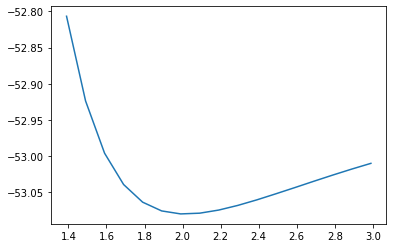

In [11]:
bond_scan_brc = np.loadtxt('morse_data/morse_brc.txt',unpack=True)
bond_distance_brc= np.linspace(1.390035559628, 2.990035559628, 17)
plt.plot(bond_distance_brc,bond_scan_brc)

The Morse fitting parameters are: D_e= 298.89604040482175 alpha= 15.283653247541368 r_e= 0.2002291212411969


/opt/anaconda3/envs/modelling/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


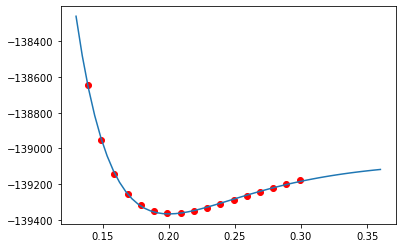

In [12]:
xdata=bond_distance_brc*0.1 #Conversion Å to nm for GROMACS
ydata= bond_scan_brc*2625.5 #Conversion Hartree to kJ/mol for GROMACS


t=np.linspace(0.13,0.36)

tstart = [1000, 1, 3, 1]
def morse(x, q, m, u, v):
    return (q * (np.exp(-2*m*(x-u))-2*np.exp(-m*(x-u))+v))

popt, pcov = curve_fit(morse, xdata, ydata, p0 = tstart,  maxfev=40000000)
print('The Morse fitting parameters are:','D_e=',popt[0],'alpha=',popt[1],'r_e=',popt[2])


yfit = morse(t,popt[0], popt[1], popt[2],popt[3])

#print popt
#
#
#
plt.plot(xdata, ydata,"ro")
plt.plot(t, yfit)

plt.show()

Now let us define the non bonded interactions and fit those with another morse potential. We will need the $\sigma$ and $\epsilon$ values for the atoms involved. Those can be easily obtained from the force field or from literature.

In this case we have found the following values for C, Cl, and Br.
```
#eps_cl = 2.970636e+01
#sig_cl = 4.020000e-01
#eps_c  = 2.761453e-01
#sig_c  = 3.499999e-01
#eps_br = 1.966482e+00
#sig_br = 3.470000e-01
```
Let us start with the non-bonded interaction of Cl-C using a 12-6 Lennard-Jones potential defined by:
$$
E_{LJ} = 4\varepsilon\left(\left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6\right)
$$

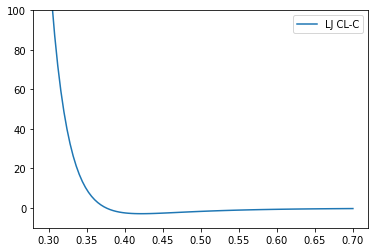

In [39]:
from cProfile import label
#definition of the Lennard-Jones potential function
def lj (eps,sig,r):
    v_lj = 4*eps*((sig/r)**12-(sig/r)**6)
    return v_lj

#Non-bonded parameters
eps_cl = 2.970636e+01
sig_cl = 4.020000e-01
eps_c  = 2.761453e-01
sig_c  = 3.499999e-01
eps_br = 1.966482e+00
sig_br = 3.470000e-01
#The combined parameters corresponds to the geometric mean for the epsilon and the regular average for the sigma
# cl-c bond
nbond_distance_clc = np.linspace(0.3,0.7,100)
eps_clc = np.sqrt(eps_cl*eps_c)
sig_clc = 0.5*(sig_cl+sig_c)

lj_clc = lj(eps_clc,sig_clc,nbond_distance_clc)
plt.plot(nbond_distance_clc,lj_clc,label='LJ CL-C')
plt.ylim(-10,100)
plt.legend()

Now, we adjust the LJ to morse

The Morse fitting parameters are: D_e= 1.933929095653984 alpha= 19.542272788718257 r_e= 0.4134193761912608


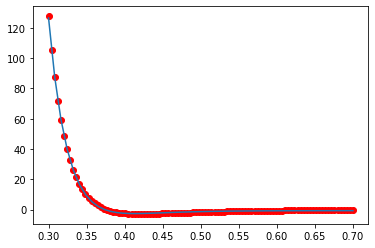

In [38]:
xdata=nbond_distance_clc
ydata= lj_clc


t=np.linspace(0.3,0.7)

tstart = [1000, 1, 3, 1]
def morse(x, q, m, u, v):
    return (q * (np.exp(-2*m*(x-u))-2*np.exp(-m*(x-u))+v))

popt, pcov = curve_fit(morse, xdata, ydata, p0 = tstart,  maxfev=40000000)
print('The Morse fitting parameters are:','D_e=',popt[0],'alpha=',popt[1],'r_e=',popt[2])


yfit = morse(t,popt[0], popt[1], popt[2],popt[3])

#print popt
#
#
#
plt.plot(xdata, ydata,"ro")
plt.plot(t, yfit)

plt.show()

The same for the Br-C bond

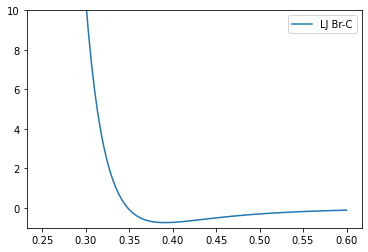

In [47]:
# br-c bond
nbond_distance_brc = np.linspace(0.25,0.6,100)
eps_brc = np.sqrt(eps_br*eps_c)
sig_brc = 0.5*(sig_br+sig_c)

lj_brc = lj(eps_brc,sig_brc,nbond_distance_brc)
plt.plot(nbond_distance_brc,lj_brc,label='LJ Br-C')
plt.ylim(-1,10)
plt.legend()

Now, we adjust the LJ to morse

The Morse fitting parameters are: D_e= 0.07490210401585733 alpha= 24.378553186652276 r_e= 0.4049843333378373


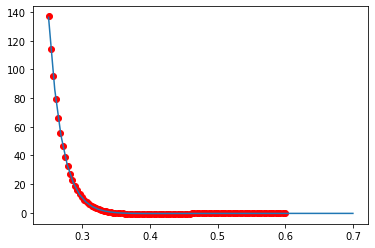

In [49]:
xdata=nbond_distance_brc
ydata= lj_brc


t=np.linspace(0.25,0.7)

tstart = [1000, 1, 3, 1]
def morse(x, q, m, u, v):
    return (q * (np.exp(-2*m*(x-u))-2*np.exp(-m*(x-u))+v))

popt, pcov = curve_fit(morse, xdata, ydata, p0 = tstart,  maxfev=40000000)
print('The Morse fitting parameters are:','D_e=',popt[0],'alpha=',popt[1],'r_e=',popt[2])


yfit = morse(t,popt[0], popt[1], popt[2],popt[3])

plt.plot(xdata, ydata,"ro")
plt.plot(t, yfit)

plt.show()

In [14]:
import py3Dmol
reactant = py3Dmol.view('REA.gro')
reactant.setStyle('sphere',scale=0.5)
reactant.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [15]:
product = py3Dmol.view('PRO.gro')
product.setStyle('sphere',scale=0.5)
product.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Now, we need to create the reaction topology, we will call it `R2P.itp` </br>
We stack the parameters for reactant and product in column <br/>
The original topologies for reactant and product are `REA.itp` and `PRO.itp` and we merge the directives `[atoms],[bonds],[angles]` as showed below:
```
[ moleculetype ]
; Name nrexcl
UNK 3

[ atoms ]
;   nr  type1      resnr residue atom  cgnr charge1    mass      type2       Charge2
    1   op_unk.CL1     1 UNK   CL1       1  -1.000000  35.453000 op_unk.CL1  -0.200000
    2   op_unk.C1      1 UNK   C1        1  -0.235300  12.011000 op_unk.C1   -0.109000
    3   op_unk.H1      1 UNK   H1        1   0.146400   1.007900 op_unk.H1    0.103000
    4   op_unk.BR1     1 UNK   BR1       1  -0.203900  79.904000 op_unk.BR1  -1.000000
    5   op_unk.H2      1 UNK   H2        1   0.146400   1.007900 op_unk.H2    0.103000
    6   op_unk.H3      1 UNK   H3        1   0.146400   1.007900 op_unk.H3    0.103000

[ bonds ]
; ai    aj    type     r0 (nm)   fc (kJ/(mol nm2))
    1     2     3   0.4134193761912608 50 19.542272788718257  0.18198 389.233317637426 14.76959497739664 ; Bond formation Cl-C 
    2     3     1   0.109000 284512.000  0.109000 284512.000
    2     4     3   0.2002291212411969 298.89604040482175 15.283653247541368  0.4049843333378373 50  24.378553186652276 ; Bond breaking Br-C
    2     5     1   0.109000 284512.000  0.109000 284512.000
    2     6     1   0.109000 284512.000  0.109000 284512.000

[ angles ]
;  ai    aj    ak type    theta0 (degr)   fc (kJ/(mol rad2)
    1     2     4     1    180.000   1000.000 180.0     1000.000
    1     2     3     1    107.600      0.0   107.6      426.768
    1     2     5     1    107.600      0.0   107.6      426.768
    1     2     6     1    107.600      0.0   107.6      426.768
    3     2     4     1    107.600    426.768 107.6        0.0
    3     2     5     1    107.800    276.144 107.800    276.144
    3     2     6     1    107.800    276.144 107.800    276.144
    4     2     5     1    107.600    426.768 107.6        0.0
    4     2     6     1    107.600    426.768 107.6        0.0
    5     2     6     1    107.800    276.144 107.800    276.144

```
There is some considerations done here:
The first one is the fact that I have added an artificial angle restrain bewteen 1-2-4, i.e., Cl-C-Br of 180 degrees to force the attack in trans (as it happens) and also avoid unestabilities in the simulation:
! [Reaction](reaction.png) <br/>
The bonds formed (Cl-C) and broken (C-Br) have a Morse potential definition (type 3). The Cl-C bonded is initially not bonded but instead of using the D parameter obtained by fitting, we will use a "fake" well with a value of 50 instead. The reason of this is because if the well depth is to shallow the simulation in the very first lambda of the FEP will be unestable (as well the last one) because there is not any bonded contribution and the Cl will be too free to move. This fix does not induce errors in the end since we are going to correct the Free Energy perturbation profile with the EVB model. <br/>
For all the angles that does not exist in reactant or product we keep the angle but we remove the bending constant.

## FEP simulation in water
After preparing the topology, the initial geometry is the reactant `REA.gro` <br/>
But, prior to start any simulation we need to build the system box, solvate it and add a counterion.
The GROMACS commands to do that are as follow:
```
gmx editconf -f REA.gro -c -d 1.0 -bt cubic -o init
gmx solvate -cp init -cs spc216.gro -p topol -o init
gmx grompp -f ions -c init -p topol -o ions
gmx genion -s ions -p topol -o init -neutral -pname NA
```
Once we have the system ready is time to generate the Molecular Dynamics Parameters (`.mdp`) files that will be used for the free energy perturbation. In this example we will use only 10 lambdas (divide the reaction coordinate in 10 intervals) and, in addition to the regular `.mdp` parameters for minimization, NVT and NPT equilibrations and, the MD simulation we need to add the free energy control parameters. Here is how does it look like:
```
; Free energy control parameters
free_energy              = yes
init_lambda_state        = 0
delta_lambda             = 0
calc_lambda_neighbors    = 1        
couple-lambda0           = vdw-q      
couple-lambda1           = vdw-q     
couple-intramol          = yes
; Vectors of lambda specified here
; init_lambda_state        0    1    2    3    4    5    6    7    8    9    10  
vdw_lambdas              = 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00
coul_lambdas             = 0.00 0.10 0.20 0.30 0.40 0.50 0.60 0.70 0.80 0.90 1.00
bonded_lambdas           = 0.00 0.10 0.20 0.30 0.40 0.50 0.60 0.70 0.80 0.90 1.00
restraint_lambdas        = 0.00 0.10 0.20 0.30 0.40 0.50 0.60 0.70 0.80 0.90 1.00
; Masses are not changing (particle identities are the same at lambda = 0 and lambda = 1)
mass_lambdas             = 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
; Not doing simulated temperting here
temperature_lambdas      = 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 0.00 
; Options for the decoupling
sc-alpha                 = 0.5
sc-coul                  = no       ; linear interpolation of Coulomb (none in this case)
sc-power                 = 1
sc-sigma                 = 0.3
nstdhdl                  = 10
disre		= simple
nstdisreout     = 0
```
We add this ending to all the files, and the FEP mdp files are called in this tutorial `em_fep.mdp,nvt_fep.mdp,npt_fep.mdp,md_fep.mdp`. We need one of those per lambda, where we change the `init_lambda_state` for the lambda that corresponds. Doing 10 manually per type of simulation (minimization, NVT, NPT and MD) means doing 40 manually changing the value. <br/>
Luckily, we will use the script `generate_mdp.sh` to automatically generate all the mdp files per lambda and store those in the folder [MDP](MDP/). Note that it needs the pearl script `write_mdp.pl`

### Try yourself

Generate all the mdp files from the templates and save it in the folder MDP

In [53]:
import os
! bash generate_mdp.sh

Now we create the box, solvate with SPC/E water and add a Na+ counterion to balance the total charge 

In [54]:
! gmx editconf -f REA.gro -c -d 1.0 -bt cubic -o init
! gmx solvate -cp init -cs spc216.gro -p topol -o init
! gmx grompp -f ions -c init -p topol -o ions
! printf '4' | gmx genion -s ions -p topol -o init -neutral -pname NA

                :-) GROMACS - gmx editconf, 2022-conda_forge (-:

Executable:   /opt/anaconda3/envs/modelling/bin.SSE2/gmx
Data prefix:  /opt/anaconda3/envs/modelling
Working dir:  /Users/juandegracia/Library/CloudStorage/OneDrive-KTH/10_EVB_tutorial/EVB_gromacs_tutorial
Command line:
  gmx editconf -f REA.gro -c -d 1.0 -bt cubic -o init

Note that major changes are planned in future for editconf, to improve usability and utility.
Read 6 atoms
Volume: 0 nm^3, corresponds to roughly 0 electrons
No velocities found
    system size :  0.157  0.475  0.182 (nm)
    diameter    :  0.475               (nm)
    center      :  0.000  0.077  0.000 (nm)
    box vectors :  0.000  0.000  0.000 (nm)
    box angles  :   0.00   0.00   0.00 (degrees)
    box volume  :   0.00               (nm^3)
    shift       :  1.237  1.161  1.237 (nm)
new center      :  1.237  1.237  1.237 (nm)
new box vectors :  2.475  2.475  2.475 (nm)
new box angles  :  90.00  90.00  90.00 (degrees)
new box volume  :  15.16     

Now, we can run the FEP simulation. To do it automatically I leave the bash script `gen_fep.sh` that executes all in an ordered manner. It can be executed as `bash gen_fep.sh`.<br/>
It will also create folders called `Lambda_*` where it will store the FEP data and trajectories. For space reasons, in this tutorial, those folders have been deleted. The needed info are the `md.xvg` files out of the MD simulations per lambda, and those files can be found in the folder [FEP_data](FEP_data/) 

Now we need to extract and tidy up the data for the EVB script <br/>
To do that let's execute the the following script: `extract_lamb.sh` (doing `bash extract_lamb.sh`) associated to the python script `extract_lambdas.py`. The tidied potential energies are stored as `1.txt, 2.txt,..,10.txt`<br/>
This script extract the columns from `md_lambda.xvg` corresponding to the potential energies needed.

We can execute the GROMACS function `bar` to get the FEP profile from the simulation

In [1]:
! gmx bar -f FEP_data/md*.xvg -o -oi

                  :-) GROMACS - gmx bar, 2022-conda_forge (-:

Executable:   /opt/anaconda3/envs/modelling/bin.SSE2/gmx
Data prefix:  /opt/anaconda3/envs/modelling
Working dir:  /Users/juandegracia/Library/CloudStorage/OneDrive-KTH/10_EVB_tutorial/EVB_gromacs_tutorial
Command line:
  gmx bar -f FEP_data/md0.xvg FEP_data/md1.xvg FEP_data/md10.xvg FEP_data/md2.xvg FEP_data/md3.xvg FEP_data/md4.xvg FEP_data/md5.xvg FEP_data/md6.xvg FEP_data/md7.xvg FEP_data/md8.xvg FEP_data/md9.xvg -o -oi

FEP_data/md0.xvg: Ignoring set 'pV (kJ/mol)'.
FEP_data/md0.xvg: 0.0 - 200.0; lambda = (0, 0, 0, 0, 0)
    dH/dl & foreign lambdas:
        dH/dl (mass-lambda) (10001 pts)
        dH/dl (coul-lambda) (10001 pts)
        dH/dl (vdw-lambda) (10001 pts)
        dH/dl (bonded-lambda) (10001 pts)
        dH/dl (restraint-lambda) (10001 pts)
        delta H to (0, 0, 0, 0, 0) (10001 pts)
        delta H to (0, 0.1, 0, 0.1, 0.1) (10001 pts)


FEP_data/md1.xvg: Ignoring set 'pV (kJ/mol)'.
FEP_data/md1.xvg: 0.0 -

It is time to continue with the next notebook, which is the [EVB notebook](EVB_notebook.ipynb)